<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.208373,-0.002646,109.205728,109.208488,-0.002760
1,0.0,1.0,41.220114,0.010462,51.230577,51.222533,0.008043
2,0.0,2.0,39.347086,0.015409,49.362494,49.349579,0.012915
3,0.0,3.0,72.980639,0.002357,82.982996,82.981795,0.001201
4,0.0,4.0,91.351430,-0.000494,101.350935,101.351856,-0.000921
...,...,...,...,...,...,...,...
29995,999.0,25.0,65.347203,0.001781,75.348984,75.348117,0.000867
29996,999.0,26.0,94.753280,0.000326,104.753607,104.755294,-0.001687
29997,999.0,27.0,36.143153,-0.044108,46.099045,46.142975,-0.043930
29998,999.0,28.0,45.008970,-0.016182,54.992787,55.009124,-0.016336


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.208373,-0.002646,109.205728,109.208488,-0.002760
1,0.0,1.0,41.220114,0.010462,51.230577,51.222533,0.008043
2,0.0,2.0,39.347086,0.015409,49.362494,49.349579,0.012915
3,0.0,3.0,72.980639,0.002357,82.982996,82.981795,0.001201
4,0.0,4.0,91.351430,-0.000494,101.350935,101.351856,-0.000921
...,...,...,...,...,...,...,...
29995,999.0,25.0,65.347203,0.001781,75.348984,75.348117,0.000867
29996,999.0,26.0,94.753280,0.000326,104.753607,104.755294,-0.001687
29997,999.0,27.0,36.143153,-0.044108,46.099045,46.142975,-0.043930
29998,999.0,28.0,45.008970,-0.016182,54.992787,55.009124,-0.016336


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    99.208373 -0.002646  109.205728  109.208488 -0.002760
      1.0    41.220114  0.010462   51.230577   51.222533  0.008043
      2.0    39.347086  0.015409   49.362494   49.349579  0.012915
      3.0    72.980639  0.002357   82.982996   82.981795  0.001201
      4.0    91.351430 -0.000494  101.350935  101.351856 -0.000921
...                ...       ...         ...         ...       ...
999.0 25.0   65.347203  0.001781   75.348984   75.348117  0.000867
      26.0   94.753280  0.000326  104.753607  104.755294 -0.001687
      27.0   36.143153 -0.044108   46.099045   46.142975 -0.043930
      28.0   45.008970 -0.016182   54.992787   55.009124 -0.016336
      29.0   35.727270 -0.013716   45.713555   45.727077 -0.013523

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    99.208373 -0.002646  109.205728  109.208488 -0.002760
      1.0    41.220114  0.010462   51.230577   51.222533  0.008043
      2.0    39.347086  0.015409   49.362494   49.349579  0.012915
      3.0    72.980639  0.002357   82.982996   82.981795  0.001201
      4.0    91.351430 -0.000494  101.350935  101.351856 -0.000921
...                ...       ...         ...         ...       ...
999.0 25.0   65.347203  0.001781   75.348984   75.348117  0.000867
      26.0   94.753280  0.000326  104.753607  104.755294 -0.001687
      27.0   36.143153 -0.044108   46.099045   46.142975 -0.043930
      28.0   45.008970 -0.016182   54.992787   55.009124 -0.016336
      29.0   35.727270 -0.013716   45.713555   45.727077 -0.013523

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.208373,-0.002646,109.205728,109.208488,-0.002760
1,0.0,1.0,41.220114,0.010462,51.230577,51.222533,0.008043
2,0.0,2.0,39.347086,0.015409,49.362494,49.349579,0.012915
3,0.0,3.0,72.980639,0.002357,82.982996,82.981795,0.001201
4,0.0,4.0,91.351430,-0.000494,101.350935,101.351856,-0.000921
...,...,...,...,...,...,...,...
29995,999.0,25.0,65.347203,0.001781,75.348984,75.348117,0.000867
29996,999.0,26.0,94.753280,0.000326,104.753607,104.755294,-0.001687
29997,999.0,27.0,36.143153,-0.044108,46.099045,46.142975,-0.043930
29998,999.0,28.0,45.008970,-0.016182,54.992787,55.009124,-0.016336


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    99.208373 -0.002646  109.205728  109.208488 -0.002760
      1.0    41.220114  0.010462   51.230577   51.222533  0.008043
      2.0    39.347086  0.015409   49.362494   49.349579  0.012915
      3.0    72.980639  0.002357   82.982996   82.981795  0.001201
      4.0    91.351430 -0.000494  101.350935  101.351856 -0.000921
...                ...       ...         ...         ...       ...
999.0 25.0   65.347203  0.001781   75.348984   75.348117  0.000867
      26.0   94.753280  0.000326  104.753607  104.755294 -0.001687
      27.0   36.143153 -0.044108   46.099045   46.142975 -0.043930
      28.0   45.008970 -0.016182   54.992787   55.009124 -0.016336
      29.0   35.727270 -0.013716   45.713555   45.727077 -0.013523

[30000 rows x 5 columns]

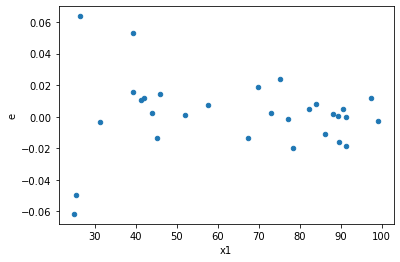

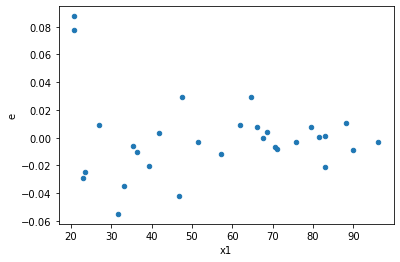

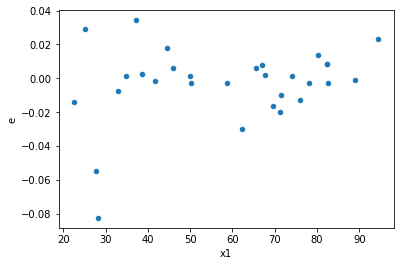

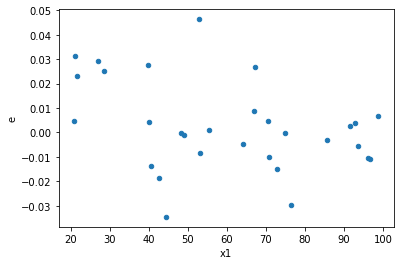

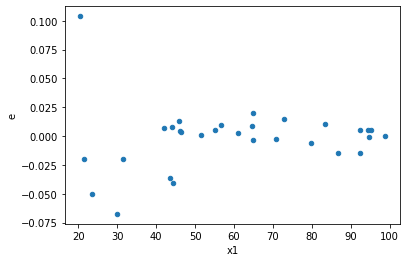

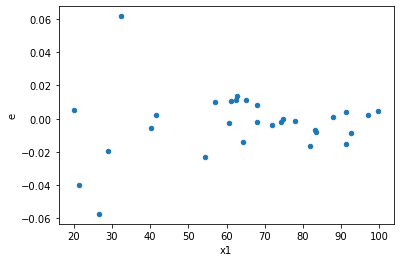

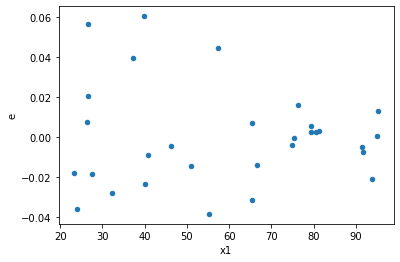

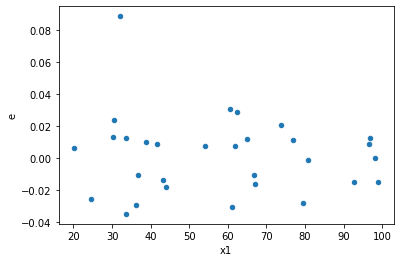

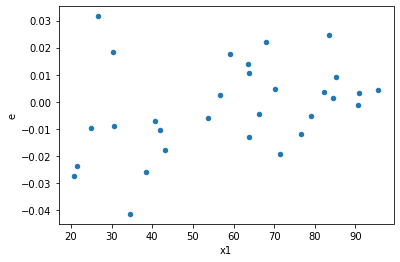

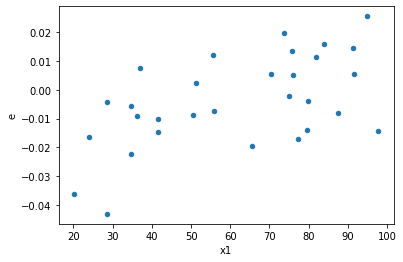

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,11.0,11.0,0.0016085610713616452,0.0021041990910842822,0.00014623282466924047,0.00019129082646220747,1.3081250867914391,0.6637203206229585,0.6681398396885208,0.33186016031147925,Reject001=1 : Homoscedasticity
100.0,11.0,11.0,0.0027112243643628085,0.0032658271002717625,0.00024647494221480075,0.00029689337275197843,1.204558037762875,0.7630370884457036,0.6184814557771482,0.3815185442228518,Reject001=1 : Homoscedasticity
167.0,11.0,11.0,0.0022907775339718645,0.0023033844498008497,0.0002082525030883513,0.0002093985863455318,1.005503334846805,0.9929013268041689,0.5035493365979156,0.49645066340208444,Reject001=1 : Homoscedasticity
198.0,11.0,11.0,0.003336421173523528,0.0039431846446299846,0.0003033110157748662,0.0003584713313299986,1.1818605744147301,0.7866096655103774,0.6066951672448113,0.3933048327551887,Reject001=1 : Homoscedasticity
239.0,11.0,11.0,0.0018746518939954722,0.002134626910493764,0.00017042289945413383,0.00019405699186306945,1.1386790888116318,0.8333101061268342,0.5833449469365829,0.4166550530634171,Reject001=1 : Homoscedasticity
485.0,11.0,11.0,0.0012144010827702186,0.001644461379617175,0.00011040009843365623,0.00014949648905610683,1.354133657280615,0.623750875532971,0.6881245622335145,0.3118754377664855,Reject001=1 : Homoscedasticity
728.0,11.0,11.0,0.002748390794535851,0.0029324298447556876,0.0002498537085941683,0.00026658453134142615,1.066962475127529,0.9163251489809392,0.5418374255095304,0.4581625744904696,Reject001=1 : Homoscedasticity
839.0,11.0,11.0,0.0033791591513242826,0.004057427178219199,0.0003071962864840257,0.00036885701620174534,1.2007209475851721,0.7669754322953066,0.6165122838523467,0.3834877161476533,Reject001=1 : Homoscedasticity
911.0,11.0,11.0,0.0009985721673326337,0.0016497881272553641,9.077928793933034e-05,0.00014998073884139675,1.6521471168801407,0.41805560994108326,0.7909721950294584,0.20902780497054163,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.012901511231976234,0.001162616763270237,0.0011728646574523849,0.000105692433024567,0.0901147735614651,0.00038614932656618595,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,0.015435818280459266,0.0007758193733125289,0.0014032562073144786,7.052903393750262e-05,0.050260981259067125,2.1964284192675786e-05,Reject001=0 : Heteroscedasticity
2.0,11.0,11.0,0.010213095743601183,0.0006903357673134473,0.0009284632494182893,6.275779702849521e-05,0.06759319452634759,9.629665475873618e-05,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,0.0029329418235918923,0.0010951444541993014,0.0002666310748719902,9.955858674539103e-05,0.37339453697656655,0.11710031880073422,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,0.02108607310240032,0.0009938118257148457,0.0019169157365818473,9.034652961044052e-05,0.04713119512052321,1.5854505185286478e-05,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,0.0090397981912128,0.0005353408087197494,0.0008217998355648001,4.866734624724995e-05,0.05922043804474874,5.0047008901880905e-05,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,0.011856879479380746,0.0008900483224155752,0.0010778981344891586,8.091348385596138e-05,0.07506598375764718,0.00016072136971868002,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,0.011654466444201896,0.002512880850868036,0.0010594969494728997,0.000228443713715276,0.21561526328974037,0.017235419691434224,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,0.004345467441816723,0.0016828016963219327,0.0003950424947106112,0.00015298197239290296,0.38725447120561063,0.13076834100141382,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    565
Reject001=1 : Homoscedasticity      435
Name: Result_test, dtype: int64